<a href="https://colab.research.google.com/github/Bohdan-at-Kulinich/Machine-Learning/blob/main/Improving_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Tuning key gradient descent parameters

In [ ]:
# Training MNIST model with an incorrectly high learning rate:

from tensorflow.keras.datasets import mnist 
from tensorflow import keras 
from tensorflow.keras import layers

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32") / 255 

model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer=keras.optimizers.RMSprop(1.), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128, 
          validation_split=0.2)


# The model quickly reaches a training and validation accuracy in the 30% range, 
# and do not go beyond that

In [ ]:
# The same model with a more appropriate learning rate:

from tensorflow.keras.datasets import mnist 
from tensorflow import keras 
from tensorflow.keras import layers

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32") / 255 

model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels,
          epochs=10, 
          batch_size=128, 
          validation_split=0.2
          )

# Too high learning rate may lead to updates that overshoot a proper fit, 
# leading to the stalled validation accuracy.
# Too low learning rate may make the trainig proccess too slow.

# A batch size with more examples will lead to gradients that are more informative 
# and less noisy leading to the lower variance 


### Increasing the model capacity

In [ ]:
# Simple logistic regression trained on MNIST pixels:

model = keras.Sequential([
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20, 
    batch_size=128,
    validation_split=0.2
)


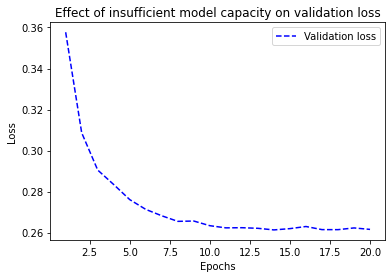

In [ ]:
# Loss curve:

import matplotlib.pyplot as plt 

val_los = history_small_model.history['val_loss']
epochs = range(1, 21)
plt.plot(epochs, val_los, "b--", label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# The validation loss goes to 0.26 and then just stays there. 
# We can fit but can't overfit, even after many iterations over the training data. 
# But it should always be possible to overfit! 
# The problem is most likely with the representation power of the model:
# we need a bigger model with more capacity able to store more information. 

In [ ]:
# We can increase representation power by adding more layers, 
# using bigger layers (with more parameters), 
# or using more appropriate layers (better architecture priors)

# Train a bigger model with two intermediate layers with 96 units each:

model = keras.Sequential([
    layers.Dense(96, activation='relu'),
    layers.Dense(96, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='rmsprop', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_large_model = model.fit(
    train_images, train_labels, 
    epochs=20, 
    batch_size=128, 
    validation_split=0.2
)

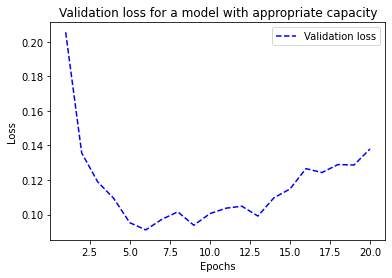

In [7]:
# Validation loss for a model with appropriate capaciy:

val_loss = history_large_model.history['val_loss']
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--", label="Validation loss")
plt.title("Validation loss for a model with appropriate capacity")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# The model fits fast and starts overfitting after 6 epochs. 